In [418]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import polars as pl
import datetime

data = yf.download(tickers='BTC-USD', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


SLOPE, INTERCEPTS and difference STEPS

In [367]:
# 2 argument l avna
def direction_and_steps(datapoints):
    if datapoints.index[0] > datapoints.index[1]:
        startIndex = datapoints.index[0]
        endIndex = datapoints.index[1]
    else:
        startIndex = datapoints.index[1]
        endIndex = datapoints.index[0]
    a = datapoints.head(1)
    b = datapoints.tail(1)
    a_value = a[0]
    b_value = b[0]
    ascending = False

# ========================
    if b.index < a.index:
        oldIndex = b.index
        newIndex = a.index
        if b_value > a_value:
            max = b_value
            min = a_value
            ascending = False
            print("descending")
        else:
            max = a_value
            min = b_value
            ascending = True
            print('ascending')
    elif b.index > a.index:
        oldIndex = a.index
        newIndex = b.index
        if b_value > a_value:
            max = b_value
            min = a_value
            ascending = True
            print('ascending')
        else:
            max = a_value
            min = b_value
            ascending = False
            print('descending')

    top_diff = max - min
    print('difference = ', top_diff)
    filtered = df[(df.index <= startIndex) & (df.index >= endIndex)]
    numrange = len(filtered)
    print('range =', numrange)
    diff_step = top_diff/numrange
    return diff_step, ascending

resistance_points = resistances.sort_values(ascending=False).tail(2)

diff_step, lineAscending = direction_and_steps(resistance_points)
print('diff = ', diff_step)
lineAscending

descending
difference =  6.9550018310546875
range = 49
diff =  0.14193881287866708


False

EXTREMUM hoorondiin data range easify

In [379]:
def start_end_ragne(datapoints):
    if datapoints.index[1] > datapoints.index[0]:
        startIndex = datapoints.index[0]
        endIndex = datapoints.index[1]
    else:
        startIndex = datapoints.index[1]
        endIndex = datapoints.index[0]
    return startIndex, endIndex

start, end = start_end_ragne(resistance_points)
print("started= ", start)
print('ended =', end)

started=  2015-06-30 00:00:00
ended = 2015-07-06 00:00:00


RESISTANCE until NOW

In [396]:
def resistance(df):
    print("Calculating resistance")
    resistances = df[df.High == df.High.rolling(6, center=True).max()].High
    resistance_points = resistances.sort_values(ascending=True).tail(2)

    # resistance coefficients
    diff_step, lineAscending = direction_and_steps(resistance_points)
    start, end = start_end_ragne(resistance_points)
    # today = df[(df.index > resistance_points.index[0])]
    today = df[(df.index > start)]

    x_values = []
    y_values = []

    y = resistance_points[0]
    # today['resistance'] = np.nan

    if lineAscending == True:
        print("Ascending")
        for i in today.index:
            y = y + diff_step
            y_values.append(y)
            x_values.append(i)
            today.loc[today.index==i, 'resistance'] = y
            df.loc[df.index==i, 'resistance'] = y
    elif lineAscending == False:
        for i in today.index:
            y = y - diff_step
            y_values.append(y)
            x_values.append(i)
            today.loc[today.index==i, 'resistance'] = y
            df.loc[df.index==i, 'resistance'] = y
        print("Descending")

    print("Resistance ascending", lineAscending)
    print("Diff points", diff_step)
    # y_values
# ==== run test ====
resistance(df)

Calculating resistance
ascending
difference =  9.55499267578125
range = 7
Ascending
Resistance ascending True
Diff points 1.3649989536830358


SUPPORT

In [398]:
def support(df):
    print("Calculating support")
    supports = df[df.Low == df.Low.rolling(6, center=True).min()].Low
    support_points = supports.sort_values(ascending=True).head(2)
    # start_point
    start, end = start_end_ragne(support_points)
    support_today = df[(df.index > start)]
    # support coefficients
    diff_step, lineAscending = direction_and_steps(support_points)

    numrange = len(support_today)
    x_values = []
    y_values = []

    y = support_points[0]
    # support_today['support'] = np.nan

    if lineAscending == True:
        print("Ascending")
        for i in support_today.index:
            y = y + diff_step
            y_values.append(y)
            x_values.append(i)
            support_today.loc[support_today.index==i, 'support'] = y
            df.loc[df.index==i, 'support'] = y
    elif lineAscending == False:
        for i in support_today.index:
            y = y - diff_step
            y_values.append(y)
            x_values.append(i)
            support_today.loc[support_today.index==i, 'support'] = y
            df.loc[df.index==i, 'support'] = y
        print("Descending")

    print("Resistance ascending", lineAscending)
    print("Diff points", diff_step)

# run test
support(df)

Calculating support
descending
difference =  1.449005126953125
range = 13
Descending
Resistance ascending False
Diff points 0.11146193284254807


PLOTTING

In [432]:
now = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
now
save_name = "cryptochart_"+now
save_name

'cryptochart_2023-07-04_00:07:18'

In [450]:
df = data[500:600]
startDate = df.index[0]
endDate = df.index[-1]
df.head(1).index[0]
a = startDate.strftime("%Y-%m-%d")
a + '_saved_date_'
# startDate

Timestamp('2016-01-30 00:00:00')

Calculating resistance
descending
difference =  6.589996337890625
range = 11
Descending
Resistance ascending False
Diff points 0.599090576171875
Calculating support
ascending
difference =  12.10198974609375
range = 14
Ascending
Resistance ascending True
Diff points 0.8644278390066964


/tmp/ipykernel_3191/2036179808.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3191/2036179808.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



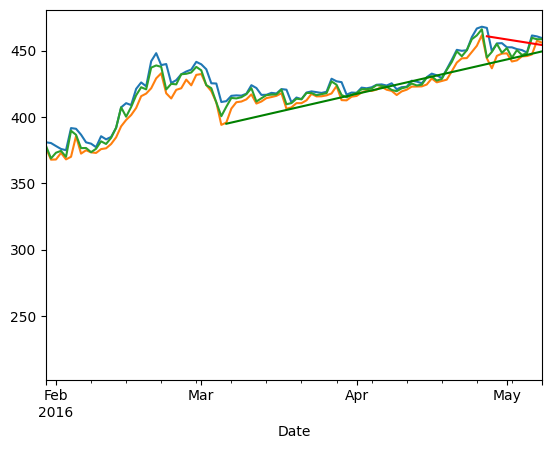

In [417]:
df = data[500:600]
df['resistance'] = np.nan
df['support'] = np.nan
# plt.plot(df.index, df.Close)
# plt.show()
# ===== Calculate Channel ====
resistance(df)
support(df)
# ====== PLOTTING =========
# MATPLOTLIB
# clean_levels = levels[abs(levels.diff() > 0)]

df.High.plot()
df.Low.plot()
df.Close.plot()
# plt.hlines(clean_levels, xmin=clean_levels.index, xmax=clean_levels.index[-1], colors='red')

plt.scatter(resistance_points.index, resistance_points, color='r')
plt.scatter(support_points.index, support_points, color="g")
plt.plot(df.index, df['resistance'], color="r")
plt.plot(df.index, df['support'], color="g")
# plt.plot(today.index, y_values, color="y")
startDate = df.index[0]
endDate = df.index[-1]

УРТ ХУГАЦААГААР ХАРАХ ХЭСЭГ

In [351]:
# with indicator

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'],
                                    increasing_line_color='green',
                                    decreasing_line_color='red'),
                                    go.Scatter(x=support_today.index, y=support_today['support'], line=dict(color="green", width=3), name="SUPPORT"),
                                    go.Scatter(x=today.index, y=today['resistance'], line=dict(color='red', width=3), name="RESISTANCE"),
                                    go.Scatter(x=df.index, y=supports, mode="markers", marker=dict(size=5, color="Orange"), name="Buy")])

fig.update(layout_xaxis_rangeslider_visible=True)
fig.update_layout(paper_bgcolor="black", plot_bgcolor="black", margin_l=0, margin_b=0, margin_r=0, margin_t=0)
fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='white')
fig.show()

POLARS
update row